<h2>Preuzimanje ključnih paketa</h2>

<h3>Za početak je potrebno klonirati yolov5 repozitorij</h3>

In [2]:
!git clone https://github.com/ultralytics/yolov5 

fatal: destination path 'yolov5' already exists and is not an empty directory.


<h3>Zatim je potrebno instalirati sve potrebne pakete navedene u reqirements.txt</h3>


In [3]:
!cd yolov5 & pip install -r requirements.txt

<h2>Testiranje predefiniranog modela</h2>

<h3>Detekcija objekata na slici</h3> 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2
import os

In [5]:
model = torch.hub.load('ultralytics/yolov5','yolov5l')

Using cache found in C:\Users\Robert/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-6-9 Python-3.7.11 torch-1.10.2 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5l_v6 summary: 367 layers, 46533693 parameters, 0 gradients
Adding AutoShape... 


In [10]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 64, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      

In [11]:
img = 'https://images.pexels.com/photos/4925870/pexels-photo-4925870.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940'

Saved 1 image to runs\detect\exp3


image 1/1: 1253x1880 1 person, 2 cups, 1 chair, 1 dining table, 1 laptop
Speed: 416.1ms pre-process, 55.8ms inference, 72.0ms NMS per image at shape (1, 3, 448, 640)


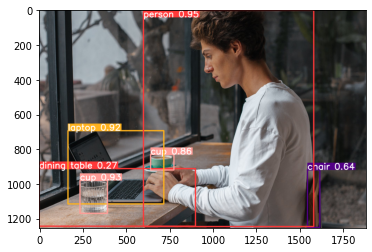

In [12]:
results = model(img)
results.print()
results.save()
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

<h3>Detekcija objekata korištenjem webcam-a</h3>

In [10]:
webCam = cv2.VideoCapture(0)
while webCam.isOpened():
    _, frame = webCam.read()
    results = model(frame)
    cv2.imshow('Object detection - yolov5',np.squeeze(results.render()))
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
        
webCam.release()
cv2.destroyAllWindows()

<h2>Treniranje model vlastitim datasetom</h2>

In [17]:
!cd yolov5 && python train.py --img 320 --batch 6 --epochs 300 --data dataset.yaml --weights yolov5l.pt --workers 0

Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)

train: weights=yolov5m.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch.yaml, epochs=300, batch_size=6, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   cb2ad9f..2dd3db0  master              -> origin/master
 * [new branch]      add/weights_dir     -> origin/add/weights_dir
   fea1ed1..152d964  classifier          -> origin/classifier
 * [new branch]      test/FReLU_v2       -> origin/test/FReLU_v2
 * [new branch]      test/alive_progress -> origin/test/alive_progress
 * [new branch]      test/conv_reduction -> origin/test/conv_reduction


module 'signal' has no attribute 'SIGALRM'


    prepare(preparation_data)
  File "C:\Users\Robert\anaconda3\envs\pytorch_p37\lib\multiprocessing\spawn.py", line 225, in prepare
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\Robert\anaconda3\envs\pytorch_p37\lib\multiprocessing\spawn.py", line 277, in _fixup_main_from_path
    run_name="__mp_main__")
  File "C:\Users\Robert\anaconda3\envs\pytorch_p37\lib\runpy.py", line 263, in run_path
    pkg_name=pkg_name, script_name=fname)
  File "C:\Users\Robert\anaconda3\envs\pytorch_p37\lib\runpy.py", line 96, in _run_module_code
    mod_name, mod_spec, pkg_name, script_name)
  File "C:\Users\Robert\anaconda3\envs\pytorch_p37\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Robert\Documents\DRD\1. Semestar\RUSU\Projekt\yolov5\train.py", line 26, in <module>
    import torch
  File "C:\Users\Robert\anaconda3\envs\pytorch_p37\lib\site-packages\torch\__init__.py", line 124, in <module>
    raise err
OSError: [WinError 1455] The paging

    pkg_name=pkg_name, script_name=fname)
  File "C:\Users\Robert\anaconda3\envs\pytorch_p37\lib\runpy.py", line 96, in _run_module_code
    mod_name, mod_spec, pkg_name, script_name)
  File "C:\Users\Robert\anaconda3\envs\pytorch_p37\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Robert\Documents\DRD\1. Semestar\RUSU\Projekt\yolov5\train.py", line 26, in <module>
    import torch
  File "C:\Users\Robert\anaconda3\envs\pytorch_p37\lib\site-packages\torch\__init__.py", line 124, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\Robert\anaconda3\envs\pytorch_p37\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "C:\Users\Robert\anaconda3\envs\pytorch_p37\lib\multiprocessing\spawn.py", line 105, in spawn_main
    exitcode = _main(fd)
  File "C:\Users\Robe

    11/299     1.05G   0.05792   0.01323   0.00772        14       320:  19%|#8        | 10/53 [00:02<00:10,  4.24it/s]
    11/299     1.05G    0.0577   0.01317  0.007465        15       320:  19%|#8        | 10/53 [00:02<00:10,  4.24it/s]
    11/299     1.05G    0.0577   0.01317  0.007465        15       320:  21%|##        | 11/53 [00:02<00:09,  4.52it/s]
    11/299     1.05G   0.05714   0.01316  0.007335        14       320:  21%|##        | 11/53 [00:02<00:09,  4.52it/s]
    11/299     1.05G   0.05714   0.01316  0.007335        14       320:  23%|##2       | 12/53 [00:02<00:09,  4.32it/s]
    11/299     1.05G   0.05668   0.01352  0.007712        18       320:  23%|##2       | 12/53 [00:02<00:09,  4.32it/s]
    11/299     1.05G   0.05668   0.01352  0.007712        18       320:  25%|##4       | 13/53 [00:02<00:09,  4.34it/s]
    11/299     1.05G   0.05606   0.01324   0.00754        10       320:  25%|##4       | 13/53 [00:03<00:09,  4.34it/s]
    11/299     1.05G   0.05606   0.01324

    18/299     1.05G   0.04937   0.01077  0.005124        12       320:  34%|###3      | 18/53 [00:04<00:08,  3.98it/s]
    18/299     1.05G   0.04937   0.01077  0.005124        12       320:  36%|###5      | 19/53 [00:04<00:08,  3.99it/s]
    18/299     1.05G   0.04919   0.01095  0.005077        13       320:  36%|###5      | 19/53 [00:04<00:08,  3.99it/s]
    18/299     1.05G   0.04919   0.01095  0.005077        13       320:  38%|###7      | 20/53 [00:04<00:07,  4.14it/s]
    18/299     1.05G   0.04933     0.011  0.005002        13       320:  38%|###7      | 20/53 [00:05<00:07,  4.14it/s]
    18/299     1.05G   0.04933     0.011  0.005002        13       320:  40%|###9      | 21/53 [00:05<00:07,  4.23it/s]
    18/299     1.05G   0.04908   0.01104  0.004964        15       320:  40%|###9      | 21/53 [00:05<00:07,  4.23it/s]
    18/299     1.05G   0.04908   0.01104  0.004964        15       320:  42%|####1     | 22/53 [00:05<00:07,  4.38it/s]
    18/299     1.05G   0.04889   0.01089

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  89%|########8 | 24/27 [00:03<00:00,  5.59it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  93%|#########2| 25/27 [00:04<00:00,  6.11it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  96%|#########6| 26/27 [00:04<00:00,  5.86it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 27/27 [00:04<00:00,  6.17it/s]
                 all        313        337      0.965      0.957      0.987      0.717

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/53 [00:00<?, ?it/s]
    44/299     1.05G   0.03339   0.01219  0.001567        14       320:   0%|          | 0/53 [00:00<?, ?it/s]
    44/299     1.05G   0.03339   0.01219  0.001567        14       320:   2%|1         | 1/53 [00:00<00:10,  5.00it/s]
    44/299     1.05G   0.03

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  37%|###7      | 10/27 [00:01<00:03,  5.52it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  41%|####      | 11/27 [00:01<00:03,  5.28it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  44%|####4     | 12/27 [00:02<00:02,  5.75it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  48%|####8     | 13/27 [00:02<00:02,  5.85it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  52%|#####1    | 14/27 [00:02<00:02,  6.25it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  56%|#####5    | 15/27 [00:02<00:01,  6.58it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  59%|#####9    | 16/27 [00:02<00:01,  6.97it/s]
               Class     Images     Labels      

    76/299     1.05G   0.02942  0.008282  0.002724        12       320:  38%|###7      | 20/53 [00:05<00:08,  3.70it/s]
    76/299     1.05G   0.02942  0.008282  0.002724        12       320:  40%|###9      | 21/53 [00:05<00:08,  3.75it/s]
    76/299     1.05G   0.02919  0.008199  0.002652        14       320:  40%|###9      | 21/53 [00:05<00:08,  3.75it/s]
    76/299     1.05G   0.02919  0.008199  0.002652        14       320:  42%|####1     | 22/53 [00:05<00:08,  3.73it/s]
    76/299     1.05G   0.02889  0.008119  0.002583        11       320:  42%|####1     | 22/53 [00:06<00:08,  3.73it/s]
    76/299     1.05G   0.02889  0.008119  0.002583        11       320:  43%|####3     | 23/53 [00:06<00:07,  3.80it/s]
    76/299     1.05G   0.02867  0.008039  0.002527        10       320:  43%|####3     | 23/53 [00:06<00:07,  3.80it/s]
    76/299     1.05G   0.02867  0.008039  0.002527        10       320:  45%|####5     | 24/53 [00:06<00:07,  3.79it/s]
    76/299     1.05G   0.02849  0.007905

    89/299     1.05G   0.02109   0.00713  0.001291        17       320:  53%|#####2    | 28/53 [00:06<00:05,  4.20it/s]
    89/299     1.05G   0.02109   0.00713  0.001291        17       320:  55%|#####4    | 29/53 [00:06<00:05,  4.09it/s]
    89/299     1.05G   0.02108  0.007215  0.001279        20       320:  55%|#####4    | 29/53 [00:07<00:05,  4.09it/s]
    89/299     1.05G   0.02108  0.007215  0.001279        20       320:  57%|#####6    | 30/53 [00:07<00:05,  3.91it/s]
    89/299     1.05G   0.02114  0.007162  0.001273        12       320:  57%|#####6    | 30/53 [00:07<00:05,  3.91it/s]
    89/299     1.05G   0.02114  0.007162  0.001273        12       320:  58%|#####8    | 31/53 [00:07<00:05,  3.84it/s]
    89/299     1.05G   0.02105   0.00719  0.001268        13       320:  58%|#####8    | 31/53 [00:07<00:05,  3.84it/s]
    89/299     1.05G   0.02105   0.00719  0.001268        13       320:  60%|######    | 32/53 [00:07<00:05,  3.99it/s]
    89/299     1.05G   0.02096  0.007246

   114/299     1.05G    0.0194  0.006874  0.001308        12       320:  42%|####1     | 22/53 [00:05<00:07,  4.43it/s]
   114/299     1.05G    0.0194  0.006874  0.001308        12       320:  43%|####3     | 23/53 [00:05<00:06,  4.46it/s]
   114/299     1.05G   0.01961   0.00693  0.001296        12       320:  43%|####3     | 23/53 [00:05<00:06,  4.46it/s]
   114/299     1.05G   0.01961   0.00693  0.001296        12       320:  45%|####5     | 24/53 [00:05<00:07,  4.14it/s]
   114/299     1.05G   0.01962  0.007132  0.001341        20       320:  45%|####5     | 24/53 [00:06<00:07,  4.14it/s]
   114/299     1.05G   0.01962  0.007132  0.001341        20       320:  47%|####7     | 25/53 [00:06<00:06,  4.24it/s]
   114/299     1.05G   0.01941  0.007048  0.001313        11       320:  47%|####7     | 25/53 [00:06<00:06,  4.24it/s]
   114/299     1.05G   0.01941  0.007048  0.001313        11       320:  49%|####9     | 26/53 [00:06<00:06,  4.19it/s]
   114/299     1.05G   0.01932  0.006987

  0%|          | 0/53 [00:00<?, ?it/s]
   125/299     1.05G   0.01974  0.004586 0.0008059        10       320:   0%|          | 0/53 [00:00<?, ?it/s]
   125/299     1.05G   0.01974  0.004586 0.0008059        10       320:   2%|1         | 1/53 [00:00<00:11,  4.61it/s]
   125/299     1.05G   0.02021  0.005722 0.0007934        14       320:   2%|1         | 1/53 [00:00<00:11,  4.61it/s]
   125/299     1.05G   0.02021  0.005722 0.0007934        14       320:   4%|3         | 2/53 [00:00<00:10,  4.96it/s]
   125/299     1.05G   0.02032  0.006058  0.000766        15       320:   4%|3         | 2/53 [00:00<00:10,  4.96it/s]
   125/299     1.05G   0.02032  0.006058  0.000766        15       320:   6%|5         | 3/53 [00:00<00:12,  4.08it/s]
   125/299     1.05G   0.01977  0.006495 0.0007648        16       320:   6%|5         | 3/53 [00:00<00:12,  4.08it/s]
   125/299     1.05G   0.01977  0.006495 0.0007648        16       320:   8%|7         | 4/53 [00:00<00:12,  4.02it/s]
   125/299     1.

   146/299     1.05G   0.01499   0.00568 0.0005759        14       320:  45%|####5     | 24/53 [00:05<00:06,  4.25it/s]
   146/299     1.05G   0.01505  0.005671 0.0005748        14       320:  45%|####5     | 24/53 [00:06<00:06,  4.25it/s]
   146/299     1.05G   0.01505  0.005671 0.0005748        14       320:  47%|####7     | 25/53 [00:06<00:06,  4.43it/s]
   146/299     1.05G   0.01501  0.005648 0.0005731        12       320:  47%|####7     | 25/53 [00:06<00:06,  4.43it/s]
   146/299     1.05G   0.01501  0.005648 0.0005731        12       320:  49%|####9     | 26/53 [00:06<00:06,  4.29it/s]
   146/299     1.05G   0.01509  0.005581 0.0005743        10       320:  49%|####9     | 26/53 [00:06<00:06,  4.29it/s]
   146/299     1.05G   0.01509  0.005581 0.0005743        10       320:  51%|#####     | 27/53 [00:06<00:06,  3.91it/s]
   146/299     1.05G   0.01507   0.00563 0.0005929        14       320:  51%|#####     | 27/53 [00:06<00:06,  3.91it/s]
   146/299     1.05G   0.01507   0.00563

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<h2>Testiranje modela</h2>

In [38]:
model = torch.hub.load('ultralytics/yolov5','custom', path = 'yolov5/runs/train/exp4/weights/best.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Robert/.cache\torch\hub\master.zip
YOLOv5  2022-6-10 Python-3.7.11 torch-1.10.2 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 290 layers, 20861016 parameters, 0 gradients, 48.0 GFLOPs
Adding AutoShape... 


In [39]:
results = model('https://cdn.pixabay.com/photo/2016/03/23/12/53/clock-1274699_1280.jpg')
results.print()

image 1/1: 720x1280 1 Clock
Speed: 391.1ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


Saved 1 image to runs\detect\exp7


image 1/1: 720x1280 1 Clock
Speed: 391.1ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


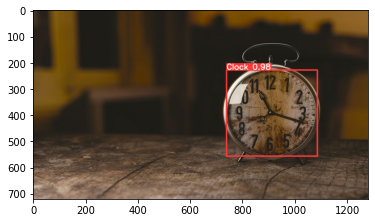

In [40]:
results.print()
results.save()
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

<h2>Testiranje modela na webcam-u</h2>

In [ ]:
webCam = cv2.VideoCapture(0)
while webCam.isOpened():
    _, frame = webCam.read()
    results = model(frame)
    cv2.imshow('Object detection, custom dataset - yolov5',np.squeeze(results.render()))
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
        
webCam.release()
cv2.destroyAllWindows()